In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# loadin the dataset 
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [12]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [14]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
#distribution of legit transaction and fraudlent transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**This dataset is highly unbalanced**

---



0 --> Normal Transaction

1 --> Fraudelent Transaction

In [17]:
# separating the data for analysis
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [18]:
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [19]:
# statistical measures of the data
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
# Compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under Sampling**

Build a sample dataset containing similar distribution of normal transactions and the fraudulent transactions

Number of fraudulent transaction --> 492

In [22]:
normal_sample = normal.sample(n=4000)

In [23]:
new_dataset = pd.concat([normal_sample, fraud], axis = 0)

In [24]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68550,53040.0,1.229537,-0.098738,0.477274,-0.246744,-0.538042,-0.491707,-0.255569,-0.034543,0.069173,...,-0.086491,-0.283524,0.021702,0.082496,0.144136,0.903439,-0.074608,0.000282,20.00,0
123154,76830.0,1.038747,0.024090,0.597918,1.279904,-0.360380,-0.006809,-0.105354,0.172839,0.054769,...,-0.103939,-0.301606,0.040780,0.195725,0.358612,-0.499563,0.029482,0.019046,41.85,0
152289,97224.0,2.197432,0.230017,-2.355273,0.029645,1.027159,-1.185080,0.734273,-0.658729,1.508526,...,-0.063265,0.225362,-0.167804,-0.995812,0.563408,0.262464,-0.113007,-0.093987,9.60,0
215842,140240.0,2.072812,0.081171,-2.181431,-0.126966,0.731667,-1.213179,0.773592,-0.482874,-0.166043,...,0.203821,0.715560,-0.112793,-0.311917,0.460184,0.241795,-0.084565,-0.088178,20.00,0
163420,115925.0,-0.224287,0.961700,0.262063,-0.470019,0.997760,-0.686925,1.288396,-0.312657,-0.412433,...,0.246860,0.883550,-0.502519,-0.414073,0.238996,-0.050823,-0.046701,-0.079965,24.08,0


In [25]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_dataset['Class'].value_counts()

0    4000
1     492
Name: Class, dtype: int64

In [27]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94197.955000,0.005991,0.005937,0.000177,0.034700,0.013521,0.022638,-0.013844,0.007747,-0.008737,...,-0.001671,0.011589,0.001345,0.002829,-0.012317,0.008811,-0.002615,0.008860,0.000162,87.718712
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Splitting the data into Features & Targets**

In [28]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [29]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
68550    53040.0  1.229537 -0.098738  0.477274 -0.246744 -0.538042 -0.491707   
123154   76830.0  1.038747  0.024090  0.597918  1.279904 -0.360380 -0.006809   
152289   97224.0  2.197432  0.230017 -2.355273  0.029645  1.027159 -1.185080   
215842  140240.0  2.072812  0.081171 -2.181431 -0.126966  0.731667 -1.213179   
163420  115925.0 -0.224287  0.961700  0.262063 -0.470019  0.997760 -0.686925   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [30]:
print(Y)

68550     0
123154    0
152289    0
215842    0
163420    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 4492, dtype: int64


In [31]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y, random_state = 2)

In [32]:
print(X.shape,X_train.shape,X_test.shape)

(4492, 30) (3593, 30) (899, 30)


**Model Training**

Using Logistic Regression Algorithm for model training

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train,Y_train)

LogisticRegression()

In [35]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print("Accuracy on training data : ",training_data_accuracy)

Accuracy on training data :  0.9796827163929863


In [37]:
# accuracy on test data
y_hat = model.predict(X_test)
test_data_accuracy = accuracy_score(y_hat,Y_test)
print("Accuracy score on test data : ",test_data_accuracy)

Accuracy score on test data :  0.9744160177975528


In [38]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(Y_test,y_hat)

array([[793,   8],
       [ 15,  83]])

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score , f1_score

In [43]:
accuracy_score(Y_test, y_hat)

0.9744160177975528

In [44]:
precision_score(Y_test,y_hat)

0.9120879120879121

In [45]:
recall_score(Y_test,y_hat)

0.8469387755102041

In [46]:
f1_score(Y_test,y_hat)

0.8783068783068784

In [47]:
from sklearn.metrics import roc_curve,roc_auc_score

In [48]:
roc_curve(Y_test,y_hat)

(array([0.        , 0.00998752, 1.        ]),
 array([0.        , 0.84693878, 1.        ]),
 array([2, 1, 0]))

In [49]:
fpr,tpr,thres = roc_curve(Y_test,y_hat)

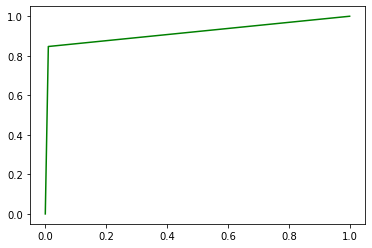

In [50]:
plt.plot(fpr,tpr,"g-",label = "current")
plt.show()

In [51]:
roc_auc_score(Y_test,y_hat)

0.9184756299523555